In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://drive.google.com/file/d/1XcTrFWMEjHTU9JZPCaGVu3dw-LStX-k9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [30]:
df.drop(columns = 'index', inplace = True, axis = 1)

In [31]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [32]:
df.duplicated().value_counts()

False    27201
True       354
dtype: int64

In [33]:
df = df.drop_duplicates()
df.shape

(27201, 9)

In [34]:
print('number of unique values in col :')
for c in df.columns:
    unique = len(df[c].unique())
    if (unique <= 20):
        print('-----> CATEGORICAL -----> ', end='')
    print(c,'= ', unique)

number of unique values in col :
product =  23541
-----> CATEGORICAL -----> category =  11
sub_category =  90
brand =  2314
sale_price =  3256
market_price =  1348
type =  426
rating =  41
description =  21945


In [35]:
df.isna().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8463
description      113
dtype: int64

In [36]:
df.isnull().mean()*100

product          0.003676
category         0.000000
sub_category     0.000000
brand            0.003676
sale_price       0.000000
market_price     0.000000
type             0.000000
rating          31.112827
description      0.415426
dtype: float64

In [37]:
df = df.dropna()
df.isnull().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

In [38]:
df.shape

(18650, 9)

## univarite variable analysis

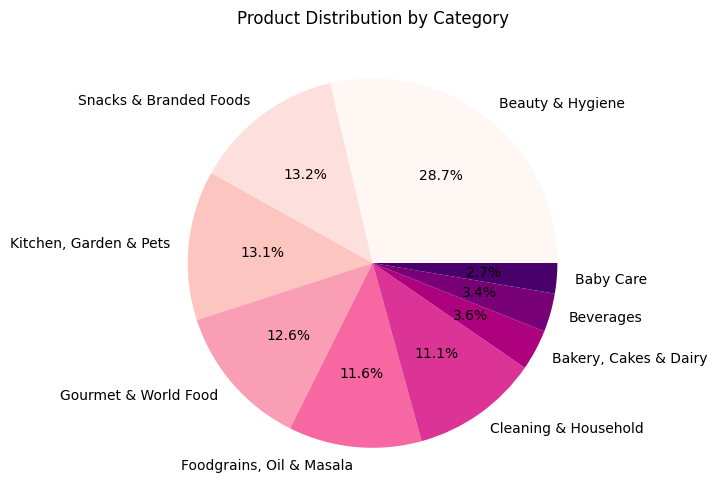

In [39]:
# Category - Pie chart
category_counts = df['category'].value_counts()
category_labels = category_counts.index
category_values = category_counts.values
cmap = plt.get_cmap('RdPu')
colors = cmap(np.linspace(0, 1, len(category_labels)))

plt.figure(figsize=(6, 6))
plt.pie(category_values, labels=category_labels, autopct='%1.1f%%', colors=colors)
plt.title('Product Distribution by Category')
plt.show()

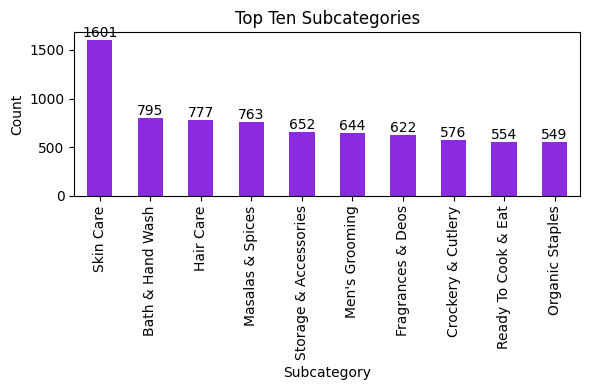

In [40]:
# Get the top ten subcategories by count
top_subcategories = df['sub_category'].value_counts().head(10)

plt.figure(figsize=(6, 4))
ax = top_subcategories.plot(kind='bar', color = 'blueviolet')
ax.set_title('Top Ten Subcategories')
ax.set_xlabel('Subcategory')
ax.set_ylabel('Count')

# Add the count labels on top of each bar
for i, count in enumerate(top_subcategories):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

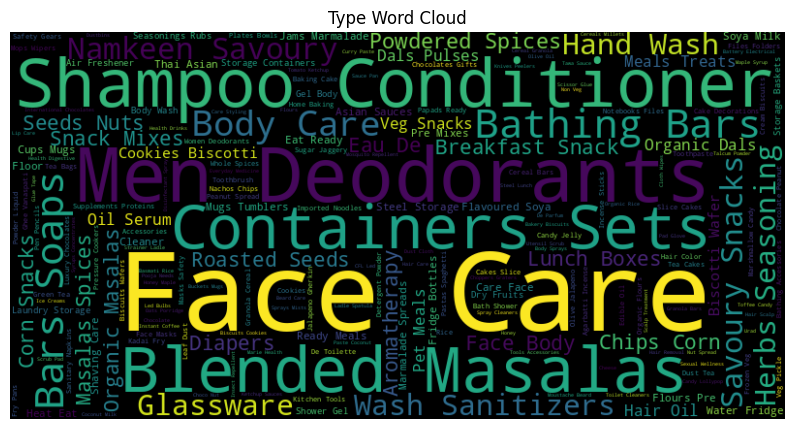

In [41]:
# type - Word cloud
from wordcloud import WordCloud

type_text = ' '.join(df['type'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(type_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Type Word Cloud')
plt.show()

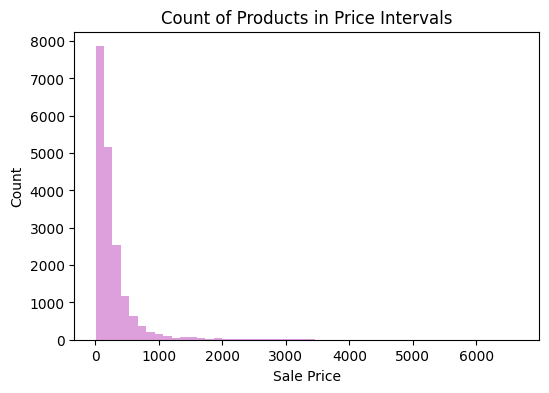

In [42]:
num_bins = 50
plt.figure(figsize=(6, 4))
plt.hist(df['sale_price'], bins=num_bins, color = 'plum')
plt.title('Count of Products in Price Intervals')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

## multivariate analysis

<Figure size 1000x600 with 0 Axes>

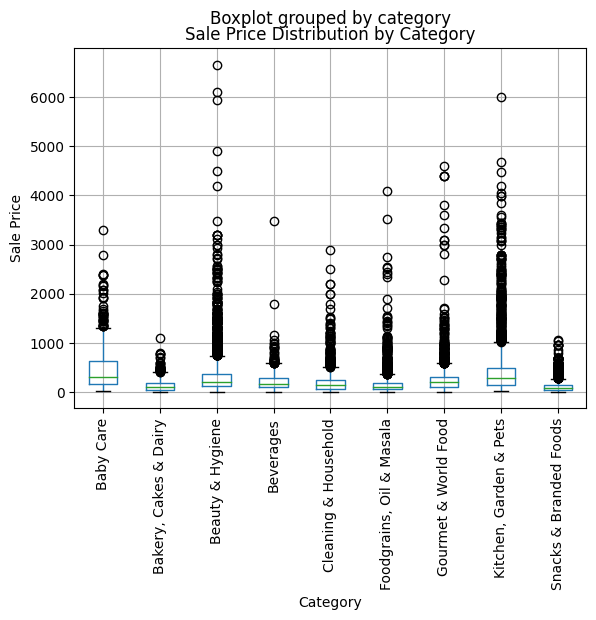

In [43]:
plt.figure(figsize=(10, 6))
df.boxplot(column='sale_price', by='category')
plt.title('Sale Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

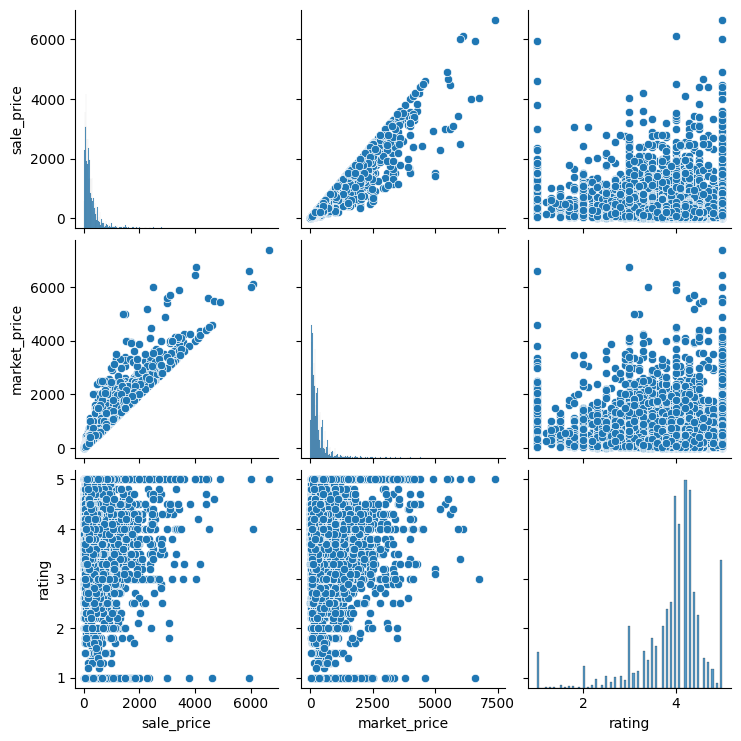

In [44]:
import seaborn as sns

sns.pairplot(df)
plt.show()

<ipython-input-45-5927c2bf1f17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


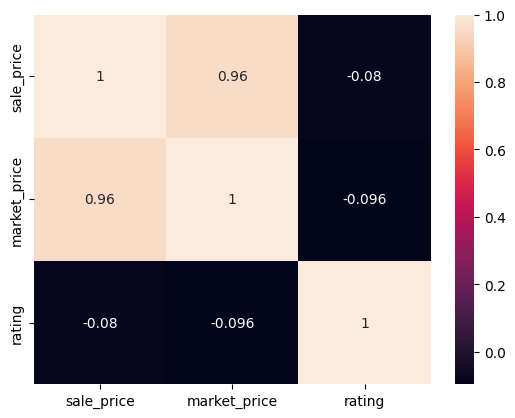

In [45]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## feature engineering

In [46]:
df['discount'] = ((df['market_price'] - df['sale_price'])/df['market_price'])*100
df['discount'] = df['discount'].astype(int)

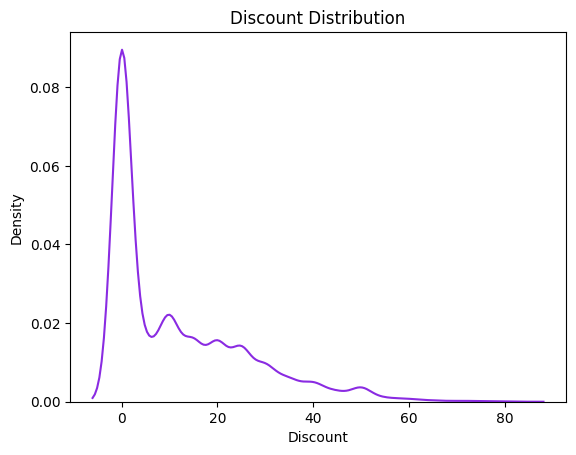

In [47]:

sns.kdeplot(df['discount'], color = 'blueviolet')
plt.title('Discount Distribution')
plt.xlabel('Discount')
plt.ylabel('Density')
plt.show()

## recommender using tfidf

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Create a TF-IDF vectorizer to convert text into a numerical representation
tfidf = TfidfVectorizer(stop_words='english')

# Create a feature matrix from the 'description' column
description_matrix = tfidf.fit_transform(df['description'])
print(description_matrix.shape)

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(description_matrix, description_matrix)
cosine_sim.shape

(18650, 23342)


(18650, 18650)

In [49]:
mapping = pd.Series(df.index,index = df['product'])

def recommend_product(input_product):
    product_index = mapping[input_product]
    similarity_score = list(enumerate(cosine_sim[product_index]))

    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    similarity_score = similarity_score[1:15]

    product_indices = [i[0] for i in similarity_score]
    return (df['product'].iloc[product_indices])

In [50]:
recommend_product('Water Bottle - Orange')

11320    Rectangular Plastic Container - With Lid, Mult...
11642                               Jar - With Lid, Yellow
26451     Round & Flat Storage Container - With lid, Green
6163     Premium Rectangular Plastic Container With Lid...
9546     Premium Round Plastic Container With Lid - Yellow
13959    Premium Rectangular Plastic Container With Lid...
19381    Premium Round & Flat Storage Container With Li...
24255      Premium Round Plastic Container With Lid - Blue
26067    Premium Round Plastic Container With Lid - Mul...
26074      Premium Round Plastic Container With Lid - Pink
8588                      Plastic Container - Square, Pink
10707                Plastic Round Glass With Lid - Yellow
13533                  Plastic Round Glass With Lid - Pink
15863                Container - Square, Tower Shape, Blue
Name: product, dtype: object

## using CountVectorizer

In [51]:
def transform_value(value):
    value = value.replace(' & ', ',')
    list_of_vals = value.split(',')
    result = [word.lower().strip() for item in list_of_vals for word in item.split()]
    return result

for col in ['category', 'sub_category', 'type']:
    # Apply the transformation to the column
    df[col] = df[col].apply(transform_value)

df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
0,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]","[hair, care]",Sri Sri Ayurveda,220.00,220.0,"[hair, oil, serum]",4.1,This Product contains Garlic Oil that is known...,0
1,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",Mastercook,180.00,180.0,"[water, fridge, bottles]",2.3,"Each product is microwave safe (without lid), ...",0
2,"Brass Angle Deep - Plain, No.2","[cleaning, household]","[pooja, needs]",Trm,119.00,250.0,"[lamp, lamp, oil]",3.4,"A perfect gift for all occasions, be it your m...",52
3,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroom, ware]",Nakoda,149.00,176.0,"[laundry, storage, baskets]",3.7,Multipurpose container with an attractive desi...,15
4,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, hand, wash]",Nivea,162.00,162.0,"[bathing, bars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...,0
...,...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic","[beauty, hygiene]","[fragrances, deos]",Layerr,199.20,249.0,[perfume],3.9,Layerr brings you Wottagirl Classic fragrant b...,20
27551,Rosemary,"[gourmet, world, food]","[cooking, baking, needs]",Puramate,67.50,75.0,"[herbs, seasonings, rubs]",4.0,Puramate rosemary is enough to transform a dis...,10
27552,Peri-Peri Sweet Potato Chips,"[gourmet, world, food]","[snacks, dry, fruits, nuts]",FabBox,200.00,200.0,"[nachos, chips]",3.8,We have taken the richness of Sweet Potatoes (...,0
27553,Green Tea - Pure Original,[beverages],[tea],Tetley,396.00,495.0,"[tea, bags]",4.2,"Tetley Green Tea with its refreshing pure, ori...",20


In [52]:
df['tags'] = df['category'] + df['sub_category'] + df['brand'].str.replace(' ', '').apply(lambda x: [x]) + df['type']

df['tags'] = df['tags'].apply(lambda x: ' '.join(x))

df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount,tags
0,Garlic Oil - Vegetarian Capsule 500 mg,"[beauty, hygiene]","[hair, care]",Sri Sri Ayurveda,220.00,220.0,"[hair, oil, serum]",4.1,This Product contains Garlic Oil that is known...,0,beauty hygiene hair care SriSriAyurveda hair o...
1,Water Bottle - Orange,"[kitchen, garden, pets]","[storage, accessories]",Mastercook,180.00,180.0,"[water, fridge, bottles]",2.3,"Each product is microwave safe (without lid), ...",0,kitchen garden pets storage accessories Master...
2,"Brass Angle Deep - Plain, No.2","[cleaning, household]","[pooja, needs]",Trm,119.00,250.0,"[lamp, lamp, oil]",3.4,"A perfect gift for all occasions, be it your m...",52,cleaning household pooja needs Trm lamp lamp oil
3,Cereal Flip Lid Container/Storage Jar - Assort...,"[cleaning, household]","[bins, bathroom, ware]",Nakoda,149.00,176.0,"[laundry, storage, baskets]",3.7,Multipurpose container with an attractive desi...,15,cleaning household bins bathroom ware Nakoda l...
4,Creme Soft Soap - For Hands & Body,"[beauty, hygiene]","[bath, hand, wash]",Nivea,162.00,162.0,"[bathing, bars, soaps]",4.4,Nivea Creme Soft Soap gives your skin the best...,0,beauty hygiene bath hand wash Nivea bathing ba...
...,...,...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic","[beauty, hygiene]","[fragrances, deos]",Layerr,199.20,249.0,[perfume],3.9,Layerr brings you Wottagirl Classic fragrant b...,20,beauty hygiene fragrances deos Layerr perfume
27551,Rosemary,"[gourmet, world, food]","[cooking, baking, needs]",Puramate,67.50,75.0,"[herbs, seasonings, rubs]",4.0,Puramate rosemary is enough to transform a dis...,10,gourmet world food cooking baking needs Purama...
27552,Peri-Peri Sweet Potato Chips,"[gourmet, world, food]","[snacks, dry, fruits, nuts]",FabBox,200.00,200.0,"[nachos, chips]",3.8,We have taken the richness of Sweet Potatoes (...,0,gourmet world food snacks dry fruits nuts FabB...
27553,Green Tea - Pure Original,[beverages],[tea],Tetley,396.00,495.0,"[tea, bags]",4.2,"Tetley Green Tea with its refreshing pure, ori...",20,beverages tea Tetley tea bags


In [53]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['tags'])

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [54]:
def recommend_product(input_product):
    product_index = mapping[input_product]
    similarity_score = list(enumerate(cosine_sim[product_index]))

    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    similarity_score = similarity_score[1:15]

    product_indices = [i[0] for i in similarity_score]
    return (df['product'].iloc[product_indices])

In [55]:
recommend_product('Water Bottle - Orange')

139           Glass Water Bottle - Aquaria Organic Purple
1038    Glass Water Bottle With Round Base - Transpare...
1701                  H2O Unbreakable Water Bottle - Pink
2209                              Water Bottle H2O Purple
2704                 H2O Unbreakable Water Bottle - Green
2908     Regel Tritan Plastic Sports Water Bottle - Black
3225              Apsara 1 Water Bottle - Assorted Colour
3481    Glass Water Bottle With Round Base - Yellow, B...
3669    Trendy Stainless Steel Bottle With Steel Cap -...
3708    Penta Plastic Pet Water Bottle - Violet, Wide ...
3834       Glass Water Bottle With Maroon Cap - BB1245MRN
3930                      Loopy Pet water Bottle - Violet
3935      Ivory Premium Glass Bottle - With Yellow Floral
3976    Double Walled Glass Bottle With Cream Cap - BB...
Name: product, dtype: object